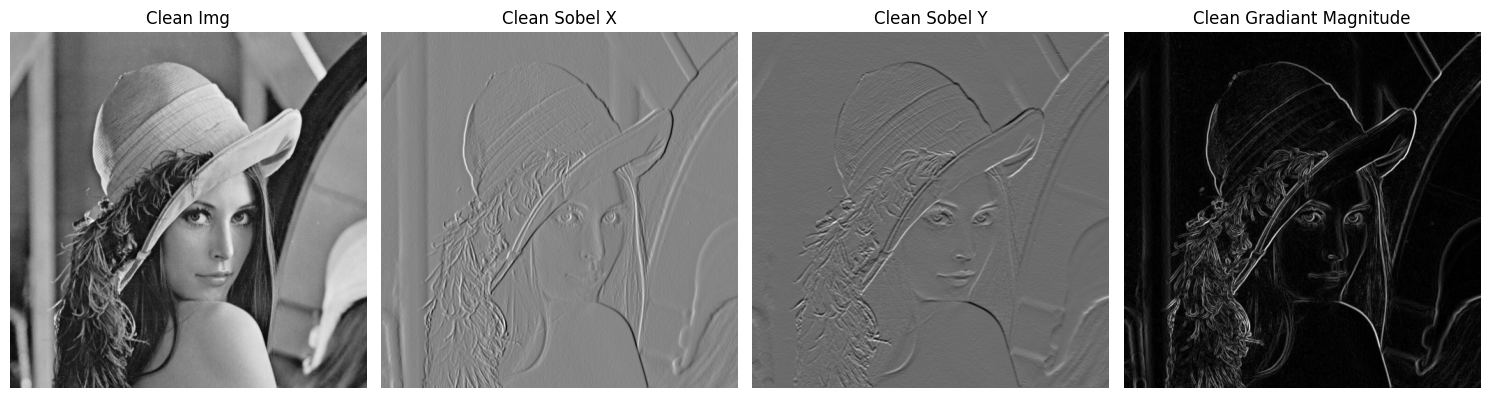

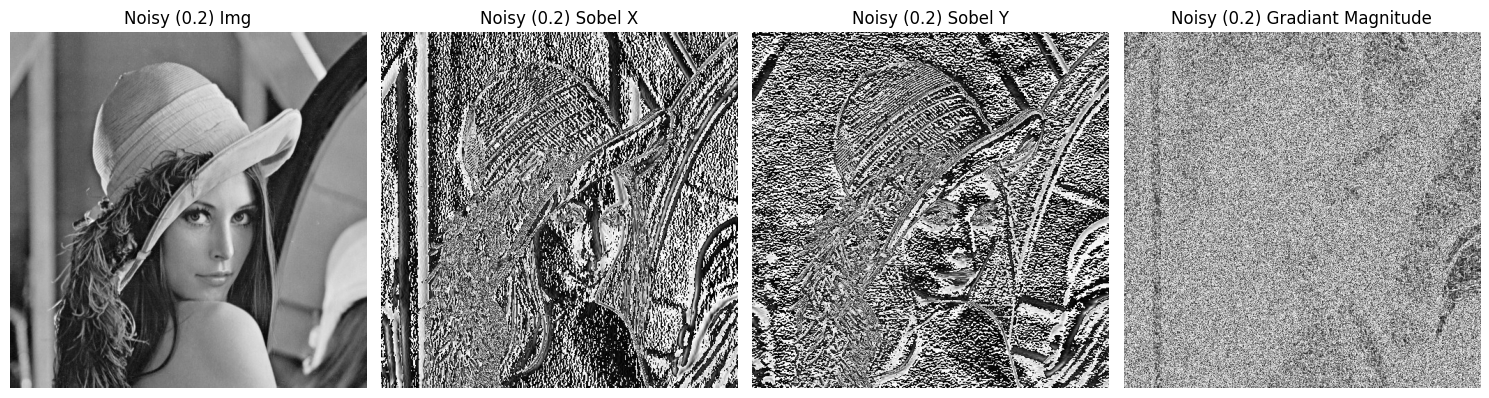

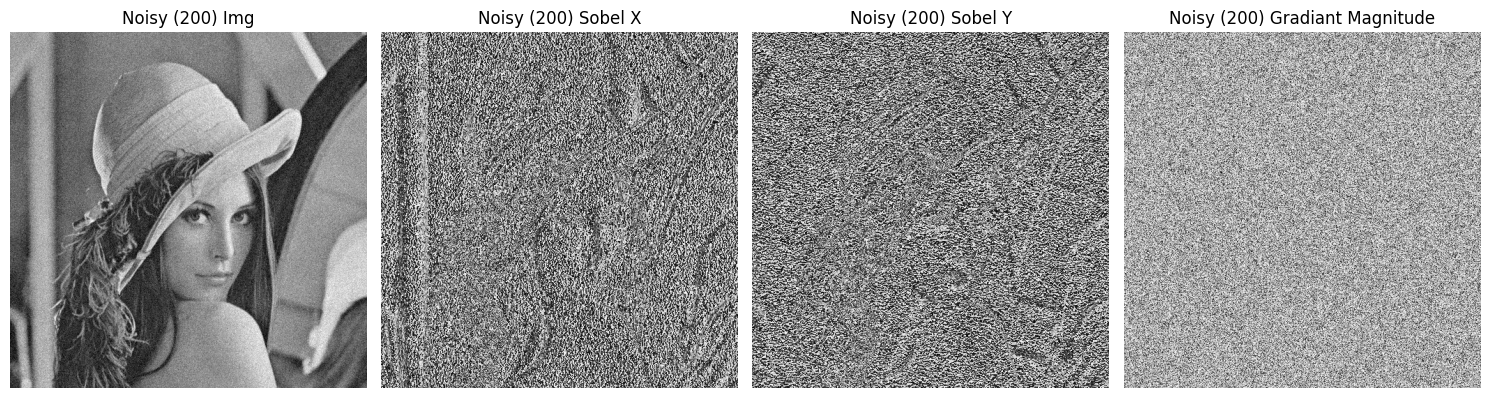

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import urllib.request
import io

# Load image from URL, with random variable names
def get_img(u):
    try:
        with urllib.request.urlopen(u) as r:
            d = r.read()
        i = Image.open(io.BytesIO(d))  # Load the image
        return np.array(i)
    except:
        print("Failed to load image")
        return None

# Apply 2D convolution, shorter names
def conv2d(im, k):
    out = np.zeros_like(im)
    p = np.pad(im, pad_width=k.shape[0]//2, mode='edge')  # 'edge' padding

    for x in range(im.shape[0]):
        for y in range(im.shape[1]):
            out[x, y] = np.sum(k * p[x:x+k.shape[0], y:y+k.shape[1]])

    return out

# Sobel edge detection with shorter names
def sobel(im):
    sx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

    gx = conv2d(im, sx)
    gy = conv2d(im, sy)

    try:
        gm = np.sqrt(gx**2 + gy**2)
    except:
        print("Gradient calculation error")
        return None, None, None

    # Normalize
    gx = (gx - gx.min()) / (gx.max() - gx.min()) * 255
    gy = (gy - gy.min()) / (gy.max() - gy.min()) * 255
    gm = np.clip((gm - gm.min()) / (gm.max() - gm.min()) * 255, 0, 255)

    return gx.astype(np.uint8), gy.astype(np.uint8), gm.astype(np.uint8)

# Add Gaussian noise with short names
def add_noise(im, m=0, v=20):
    try:
        std = v**0.5
        n_im = im + np.random.normal(m, std, im.shape)
    except:
        print("Noise addition error")
        n_im = im
    return np.clip(n_im, 0, 255).astype(np.uint8)

# Display Sobel results with shorter names
def show_sobel(orig, sx, sy, gm, pre):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    plt.title(f'{pre} Img')
    plt.imshow(orig, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.title(f'{pre} Sobel X')
    plt.imshow(sx, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.title(f'{pre} Sobel Y')
    plt.imshow(sy, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.title(f'{pre} Gradiant Magnitude')
    plt.imshow(gm, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Main function with small names
def run():
    # Load image
    url = "https://github.com/saptarshihalder/Assignment/blob/main/lena_color_512.jpg?raw=true"
    img = get_img(url)

    if img is None:
        print("Image load failed")
        return

    # Convert to grayscale
    gray = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])

    # Sobel on clean image
    sx_c, sy_c, gm_c = sobel(gray)

    # Add noise with variance 0.2
    noisy_20 = add_noise(gray, m=0, v=0.2)
    sx_n20, sy_n20, gm_n20 = sobel(noisy_20)

    # Add noise with variance 200
    noisy_200 = add_noise(gray, m=0, v=200)
    sx_n200, sy_n200, gm_n200 = sobel(noisy_200)

    # Display Sobel results for clean image
    show_sobel(gray, sx_c, sy_c, gm_c, pre="Clean")

    # Display Sobel results for noisy image with variance 0.2
    show_sobel(noisy_20, sx_n20, sy_n20, gm_n20, pre="Noisy (0.2)")

    # Display Sobel results for noisy image with variance 200
    show_sobel(noisy_200, sx_n200, sy_n200, gm_n200, pre="Noisy (200)")

if __name__ == "__main__":
    run()


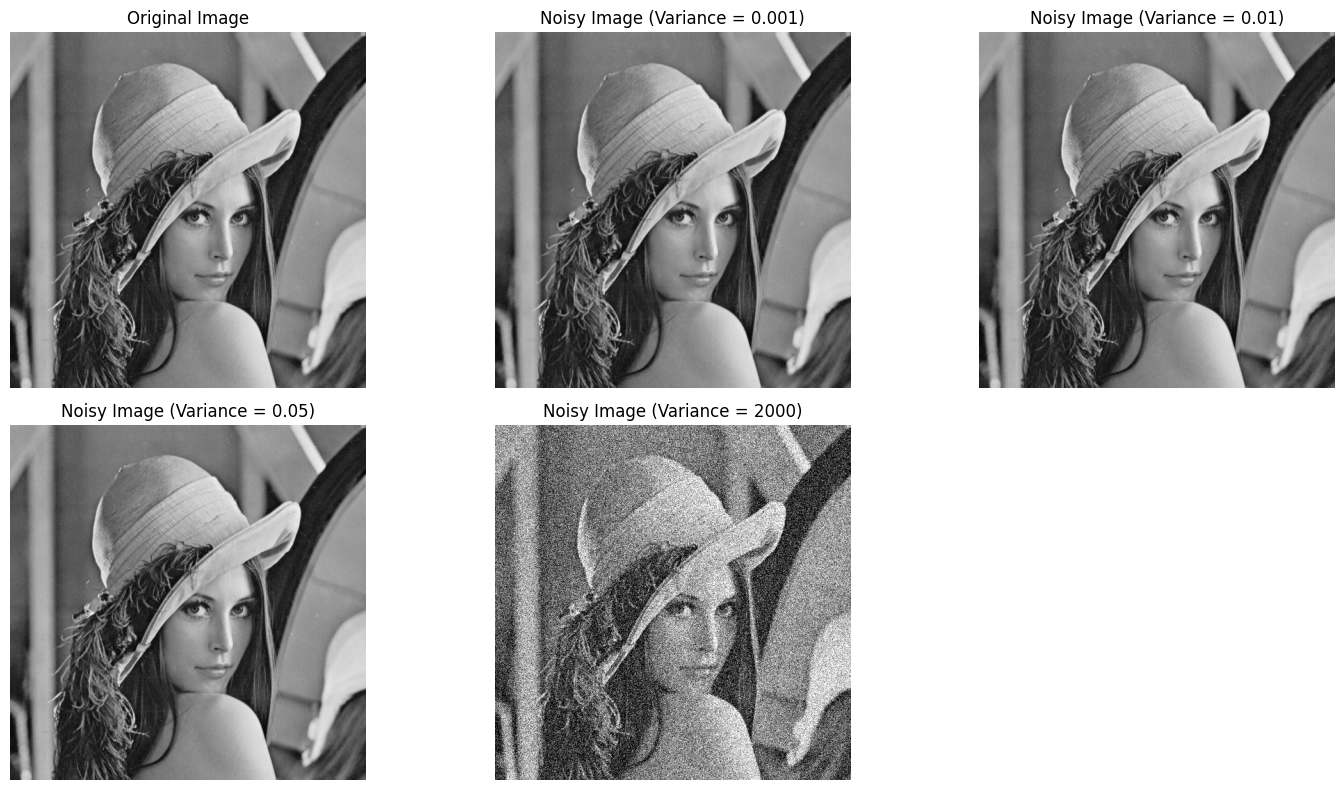

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import urllib.request
import io

# Function to load an image from URL
def load_image_from_url(url):
    with urllib.request.urlopen(url) as response:
        img_data = response.read()
    img = Image.open(io.BytesIO(img_data))  # Load the image
    return np.array(img)

# Function to add synthetic Gaussian noise
def add_gaussian_noise(image, mean=0, var=0.01):
    """Add synthetic Gaussian noise to the image with specified variance."""
    std = var**0.5
    noisy_image = image + np.random.normal(mean, std, image.shape)
    noisy_image = np.clip(noisy_image, 0, 255)  # Clip values to valid pixel range
    return noisy_image.astype(np.uint8)

# Function to display the original image and noisy images with different noise levels
def display_noise_levels(original_image, noisy_images, variances):
    plt.figure(figsize=(15, 8))

    # Display the original image
    plt.subplot(2, 3, 1)
    plt.title('Original Image')
    plt.imshow(original_image, cmap='gray')
    plt.axis('off')

    # Display images with varying levels of noise
    for i, (noisy_image, var) in enumerate(zip(noisy_images, variances)):
        plt.subplot(2, 3, i + 2)
        plt.title(f'Noisy Image (Variance = {var})')
        plt.imshow(noisy_image, cmap='gray')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Main function to execute the pipeline
def main():
    # Load the image from the provided URL
    image_url = "https://github.com/saptarshihalder/Assignment/blob/main/lena_color_512.jpg?raw=true"
    image = load_image_from_url(image_url)  # Load the image (no grayscale conversion yet)

    # Convert the image to grayscale
    grayscale_image = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])

    # Add synthetic Gaussian noise with different variances
    variances = [0.001, 0.01, 0.05, 2000]
    noisy_images = [add_gaussian_noise(grayscale_image, mean=0, var=var) for var in variances]

    # Display the original image and noisy images with different noise levels
    display_noise_levels(grayscale_image, noisy_images, variances)

if __name__ == "__main__":
    main()
